<a href="https://colab.research.google.com/github/Haniye-Rj/PathriseProject/blob/main/PathriseProcessedlogreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the Objective**
The goal is so predict the Duration of days ......

Import Dataset

In [ ]:
from google.colab import files

In [ ]:
ubloaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Read the DATA**

In [ ]:
df = pd.read_excel('Data_Pathrise.xlsx')

**Data Understanding**

In [ ]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [ ]:
df.tail()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify
2543,2544,Withdrawn,SWE,OCT19A,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

**Clean DATA**
1-
2-
3-

In [ ]:
#remove some of columns
df = df.drop(columns = ['id', 'pathrise_status', 'cohort_tag', 'highest_level_of_education', 'length_of_job_search', 'gender', 'race'])

In [ ]:
df

,primary_track,program_duration_days,placed,employment_status,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
0,SWE,NaN,0,Unemployed,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900
1,PSO,NaN,0,Unemployed,Getting past final round interviews,1-2 years,Citizen,6.0,0
2,Design,0.0,0,Employed Part-Time,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0
3,PSO,0.0,0,Contractor,Getting past final round interviews,Less than one year,Citizen,5.0,25
4,SWE,89.0,1,Unemployed,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
...,...,...,...,...,...,...,...,...,...
2539,Design,457.0,0,Contractor,Technical interviewing,5+ years,Citizen,4.0,15
2540,Data,488.0,0,NaN,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7
2541,SWE,NaN,0,Contractor,Technical interviewing,1-2 years,Citizen,1.0,30
2542,SWE,NaN,0,NaN,Technical interviewing,1-2 years,Citizen,2.0,10


In [ ]:
df = df.dropna(subset = ['program_duration_days'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1746 non-null   object 
 4   biggest_challenge_in_search  1908 non-null   object 
 5   professional_experience      1767 non-null   object 
 6   work_authorization_status    1707 non-null   object 
 7   number_of_interviews         1756 non-null   float64
 8   number_of_applications       1928 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 150.6+ KB


In [ ]:
df

,primary_track,program_duration_days,placed,employment_status,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications
2,Design,0.0,0,Employed Part-Time,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0
3,PSO,0.0,0,Contractor,Getting past final round interviews,Less than one year,Citizen,5.0,25
4,SWE,89.0,1,Unemployed,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100
5,SWE,0.0,0,Employed Full-Time,Technical interviewing,3-4 years,Green Card,5.0,100
6,SWE,0.0,0,Employed Full-Time,Getting past phone screens,3-4 years,Green Card,0.0,9
...,...,...,...,...,...,...,...,...,...
2535,PSO,0.0,0,Employed Full-Time,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20
2538,SWE,118.0,0,Employed Part-Time,Lack of relevant experience,5+ years,Other,1.0,25
2539,Design,457.0,0,Contractor,Technical interviewing,5+ years,Citizen,4.0,15
2540,Data,488.0,0,NaN,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7


In [ ]:
df['program_duration_days'].value_counts()

,count
program_duration_days,
0.0,217
13.0,34
11.0,27
12.0,25
14.0,22
...,...
363.0,1
425.0,1
157.0,1


In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.loc[:, 'professional_experience'] = df['professional_experience'].str.replace('years', '' , regex=False)
df.loc[:, 'professional_experience'] = df['professional_experience'].str.replace('year', '' , regex=False)
df.loc[:, 'professional_experience'] = df['professional_experience'].str.strip()

In [ ]:
def conver_experience(val):
  if pd.isna(val):
    return 0
  val = str(val).strip().lower()
  if 'less than one' in val:
    return .5
  if '+' in val:
    return float(val.replace('+', '').strip())
  if '-' in val:
    a, b = val.split('-')
    return (float(a)+float(b))/2
  try:
    return float(val)
  except:
    return 0

In [ ]:
df.loc[:, 'professional_experience_num'] = df['professional_experience'].apply(conver_experience)

In [ ]:
df

,primary_track,program_duration_days,placed,employment_status,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,professional_experience_num
0,Design,0.0,0,Employed Part-Time,Figuring out which jobs to apply for,Less than one,Citizen,0.0,0,0.5
1,PSO,0.0,0,Contractor,Getting past final round interviews,Less than one,Citizen,5.0,25,0.5
2,SWE,89.0,1,Unemployed,Hearing back on my applications,1-2,F1 Visa/OPT,10.0,100,1.5
3,SWE,0.0,0,Employed Full-Time,Technical interviewing,3-4,Green Card,5.0,100,3.5
4,SWE,0.0,0,Employed Full-Time,Getting past phone screens,3-4,Green Card,0.0,9,3.5
...,...,...,...,...,...,...,...,...,...,...
1923,PSO,0.0,0,Employed Full-Time,Figuring out which jobs to apply for,3-4,Citizen,0.0,20,3.5
1924,SWE,118.0,0,Employed Part-Time,Lack of relevant experience,5+,Other,1.0,25,5.0
1925,Design,457.0,0,Contractor,Technical interviewing,5+,Citizen,4.0,15,5.0
1926,Data,488.0,0,NaN,Hearing back on my applications,1-2,F1 Visa/OPT,1.0,7,1.5


In [ ]:
df['primary_track'].value_counts()

,count
primary_track,
SWE,1306
PSO,233
Design,205
Data,178
Web,4
Marketing,2


In [ ]:
def simplify_primary_track(track):
  if track in ['Web', 'Marketing']:
    return 'Other'
  return track

In [ ]:
df['primary_track'] = df['primary_track'].apply(simplify_primary_track)
df['primary_track'].value_counts()

,count
primary_track,
SWE,1306
PSO,233
Design,205
Data,178
Other,6


In [ ]:
df['primary_track'].value_counts()

,count
primary_track,
SWE,1306
PSO,233
Design,205
Data,178
Other,6


In [ ]:
df['biggest_challenge_in_search'].value_counts()

,count
biggest_challenge_in_search,
Hearing back on my applications,737
Getting past final round interviews,234
Technical interviewing,224
Lack of relevant experience,175
Getting past mid-stage interviews,160
Getting past phone screens,148
Figuring out which jobs to apply for,131
Behavioral interviewing,43
Resume gap,30


In [ ]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed',
       'employment_status ', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications',
       'professional_experience_num'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['employment_status'].value_counts()

,count
employment_status,
Student,579
Unemployed,504
Employed Full-Time,329
Employed Part-Time,199
Contractor,135


In [ ]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed', 'employment_status',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'professional_experience_num'],
      dtype='object')

In [ ]:
def simplify_employment_status(status):
  if status in ['contractor', 'Employed Full-Time', 'Employed Part-Time']:
    return 'Employed'
  return status

In [ ]:
#
df['employment_status'] = df['employment_status'].apply(simplify_employment_status)
df['employment_status'].value_counts()

,count
employment_status,
Student,579
Employed,528
Unemployed,504
Contractor,135


In [ ]:
#
df['biggest_challenge_in_search'].value_counts()

,count
biggest_challenge_in_search,
Hearing back on my applications,737
Getting past final round interviews,234
Technical interviewing,224
Lack of relevant experience,175
Getting past mid-stage interviews,160
Getting past phone screens,148
Figuring out which jobs to apply for,131
Behavioral interviewing,43
Resume gap,30


In [ ]:
#
def simplify_biggest_challenge_in_serach(search):
  if search in ['Resume gap', 'Hearing back on my applications']:
    return 'CV issue'
  elif search in ['Technical skills', 'Technical interviewing']:
    return 'Tech issue'
  elif search in['Lack of relevant experience', 'Figuring out which jobs to apply for']:
    return 'Career clarity'
  else:
    return 'Interview skills'
  return search

In [ ]:
df['biggest_challenge_in_search'] = df['biggest_challenge_in_search'].apply(simplify_biggest_challenge_in_serach)
df['biggest_challenge_in_search'].value_counts()

,count
biggest_challenge_in_search,
CV issue,767
Interview skills,605
Career clarity,306
Tech issue,250


In [ ]:
df['work_authorization_status'].value_counts()

,count
work_authorization_status,
Citizen,831
F1 Visa/OPT,488
Green Card,142
F1 Visa/CPT,97
Other,82
H1B,38
Canada Citizen,20
STEM OPT,5
Not Authorized,4


In [ ]:
def simplify_work_authorization_status(status):
  if status in ['F1 Visa/OPT','F1 Visa/CPT','Other','H1B','Canada Citizen','STEM OPT','Not Authorized']:
    return 'Other'
  return status

In [ ]:
df['work_authorization_status'] = df['work_authorization_status'].apply(simplify_work_authorization_status)
df['work_authorization_status'].value_counts()

,count
work_authorization_status,
Citizen,831
Other,734
Green Card,142


In [ ]:
df = df.loc[df['program_duration_days']<= 365]

In [ ]:
print(df.columns.tolist())

['primary_track', 'program_duration_days', 'placed', 'employment_status', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'number_of_interviews', 'number_of_applications', 'professional_experience_num']


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['employment_status'].isna().sum()

np.int64(175)

In [ ]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed', 'employment_status',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'professional_experience_num'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['professional_experience'])

In [ ]:
df

,primary_track,program_duration_days,placed,employment_status,biggest_challenge_in_search,work_authorization_status,number_of_interviews,number_of_applications,professional_experience_num
0,Design,0.0,0,Employed,Career clarity,Citizen,0.0,0,0.5
1,PSO,0.0,0,Contractor,Interview skills,Citizen,5.0,25,0.5
2,SWE,89.0,1,Unemployed,CV issue,Other,10.0,100,1.5
3,SWE,0.0,0,Employed,Tech issue,Green Card,5.0,100,3.5
4,SWE,0.0,0,Employed,Interview skills,Green Card,0.0,9,3.5
...,...,...,...,...,...,...,...,...,...
1921,Design,33.0,1,NaN,CV issue,Other,0.0,9,3.5
1922,SWE,119.0,1,Employed,Interview skills,Citizen,0.0,10,1.5
1923,PSO,0.0,0,Employed,Career clarity,Citizen,0.0,20,3.5
1924,SWE,118.0,0,Employed,Career clarity,Other,1.0,25,5.0


In [ ]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed', 'employment_status',
       'biggest_challenge_in_search', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications',
       'professional_experience_num'],
      dtype='object')

In [ ]:
pd.get_dummies(df, columns = [], dtype = int)

,primary_track,program_duration_days,placed,employment_status,biggest_challenge_in_search,work_authorization_status,number_of_interviews,number_of_applications,professional_experience_num
0,Design,0.0,0,Employed,Career clarity,Citizen,0.0,0,0.5
1,PSO,0.0,0,Contractor,Interview skills,Citizen,5.0,25,0.5
2,SWE,89.0,1,Unemployed,CV issue,Other,10.0,100,1.5
3,SWE,0.0,0,Employed,Tech issue,Green Card,5.0,100,3.5
4,SWE,0.0,0,Employed,Interview skills,Green Card,0.0,9,3.5
...,...,...,...,...,...,...,...,...,...
1921,Design,33.0,1,NaN,CV issue,Other,0.0,9,3.5
1922,SWE,119.0,1,Employed,Interview skills,Citizen,0.0,10,1.5
1923,PSO,0.0,0,Employed,Career clarity,Citizen,0.0,20,3.5
1924,SWE,118.0,0,Employed,Career clarity,Other,1.0,25,5.0


In [ ]:
#df.to_excel('Updated_cleaned_pathrise.xlsx', index = False)

In [ ]:
cleaned_df = df.dropna()

In [ ]:
cleaned_df.shape

(1355, 9)

In [ ]:
df.to_excel('clened_df.xlsx', index = False)

In [ ]:
cleaned_df.columns

Index(['primary_track', 'program_duration_days', 'placed', 'employment_status',
       'biggest_challenge_in_search', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications',
       'professional_experience_num'],
      dtype='object')

In [ ]:
# Feayure Engineering
preprocessed_df = pd.get_dummies(cleaned_df, columns =['primary_track', 'employment_status', 'biggest_challenge_in_search', 'work_authorization_status',], dtype = int)

In [ ]:
preprocessed_df

,program_duration_days,placed,number_of_interviews,number_of_applications,professional_experience_num,primary_track_Data,primary_track_Design,primary_track_Other,primary_track_PSO,primary_track_SWE,...,employment_status_Employed,employment_status_Student,employment_status_Unemployed,biggest_challenge_in_search_CV issue,biggest_challenge_in_search_Career clarity,biggest_challenge_in_search_Interview skills,biggest_challenge_in_search_Tech issue,work_authorization_status_Citizen,work_authorization_status_Green Card,work_authorization_status_Other
0,0.0,0,0.0,0,0.5,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0.0,0,5.0,25,0.5,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,89.0,1,10.0,100,1.5,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0.0,0,5.0,100,3.5,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,0.0,0,0.0,9,3.5,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,310.0,1,0.0,6,0.0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1922,119.0,1,0.0,10,1.5,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1923,0.0,0,0.0,20,3.5,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1924,118.0,0,1.0,25,5.0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 0 to 1927
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   program_duration_days                         1355 non-null   float64
 1   placed                                        1355 non-null   int64  
 2   number_of_interviews                          1355 non-null   float64
 3   number_of_applications                        1355 non-null   int64  
 4   professional_experience_num                   1355 non-null   float64
 5   primary_track_Data                            1355 non-null   int64  
 6   primary_track_Design                          1355 non-null   int64  
 7   primary_track_Other                           1355 non-null   int64  
 8   primary_track_PSO                             1355 non-null   int64  
 9   primary_track_SWE                             1355 non-null   int64 

In [ ]:
preprocessed_df['program_duration_days'].value_counts()

,count
program_duration_days,
0.0,168
13.0,26
12.0,23
14.0,20
11.0,18
...,...
363.0,1
334.0,1
157.0,1


In [ ]:
X = preprocessed_df.drop(columns = ['placed' , 'program_duration_days'])
y = preprocessed_df['placed']

In [ ]:
X

,number_of_interviews,number_of_applications,professional_experience_num,primary_track_Data,primary_track_Design,primary_track_Other,primary_track_PSO,primary_track_SWE,employment_status_Contractor,employment_status_Employed,employment_status_Student,employment_status_Unemployed,biggest_challenge_in_search_CV issue,biggest_challenge_in_search_Career clarity,biggest_challenge_in_search_Interview skills,biggest_challenge_in_search_Tech issue,work_authorization_status_Citizen,work_authorization_status_Green Card,work_authorization_status_Other
0,0.0,0,0.5,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,5.0,25,0.5,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
2,10.0,100,1.5,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
3,5.0,100,3.5,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
4,0.0,9,3.5,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.0,6,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1922,0.0,10,1.5,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1923,0.0,20,3.5,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1924,1.0,25,5.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
y

,placed
0,0
1,0
2,1
3,0
4,0
...,...
1920,1
1922,1
1923,0
1924,0


**Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#X_train.shape

In [ ]:
#y_train.shape

In [ ]:
# Prediction
predictions = logreg.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
y_test

,placed
331,0
789,0
1469,1
1474,0
1751,1
...,...
357,0
1082,1
626,1
1217,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[ 88, 127],
       [ 65, 127]])

In [ ]:
len(y_test)

407

In [ ]:
88+127+65+127

407

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48       215
           1       0.50      0.66      0.57       192

    accuracy                           0.53       407
   macro avg       0.54      0.54      0.52       407
weighted avg       0.54      0.53      0.52       407



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, predictions))

0.5282555282555282


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(X_test)

In [ ]:
y_test

,placed
331,0
789,0
1469,1
1474,0
1751,1
...,...
357,0
1082,1
626,1
1217,0


In [ ]:
confusion_matrix(y_test,prediction_knn)

array([[ 92, 123],
       [ 87, 105]])

In [ ]:
accuracy_score(y_test, prediction_knn)

0.48402948402948404

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       215
           1       0.46      0.55      0.50       192

    accuracy                           0.48       407
   macro avg       0.49      0.49      0.48       407
weighted avg       0.49      0.48      0.48       407



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


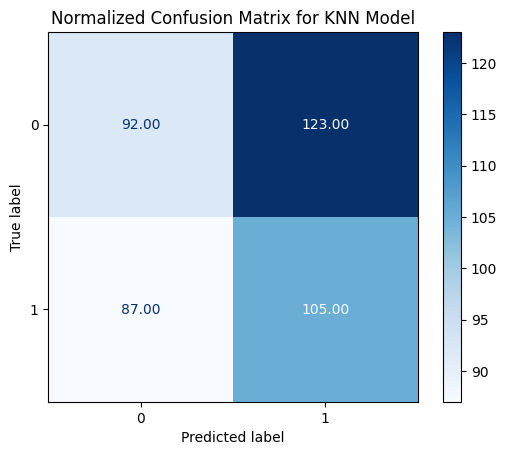

In [ ]:
cm = confusion_matrix(y_test.values.ravel(), prediction_knn)

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.2f')

plt.title('Normalized Confusion Matrix for KNN Model')
plt.show()

Decision Tree Classification

In [ ]:
from  sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
predict_tree = tree.predict(X_test)

In [ ]:
predict_tree

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [ ]:
y_test

,placed
331,0
789,0
1469,1
1474,0
1751,1
...,...
357,0
1082,1
626,1
1217,0


In [ ]:
confusion_matrix(y_test,predict_tree)

array([[106, 109],
       [102,  90]])

In [ ]:
accuracy_score(y_test,predict_tree)

0.48157248157248156

In [ ]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       215
           1       0.45      0.47      0.46       192

    accuracy                           0.48       407
   macro avg       0.48      0.48      0.48       407
weighted avg       0.48      0.48      0.48       407



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

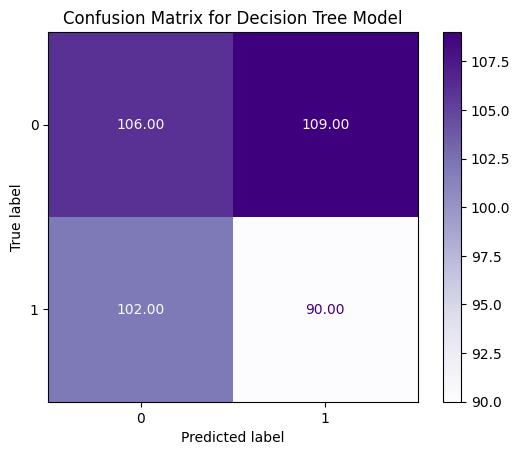

In [ ]:
# Create confusion matrix
cm_tree = confusion_matrix(y_test.values.ravel(), predict_tree)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot(cmap='Purples', values_format='.2f')  # Purple color for variety

plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predict_rf = rf.predict(X_test)

In [ ]:
predict_rf

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
y_test

,placed
331,0
789,0
1469,1
1474,0
1751,1
...,...
357,0
1082,1
626,1
1217,0


In [ ]:
confusion_matrix(y_test, predict_rf)

array([[110, 105],
       [ 89, 103]])

In [ ]:
accuracy_score(y_test, predict_rf)

0.5233415233415234

In [ ]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       215
           1       0.50      0.54      0.52       192

    accuracy                           0.52       407
   macro avg       0.52      0.52      0.52       407
weighted avg       0.53      0.52      0.52       407



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

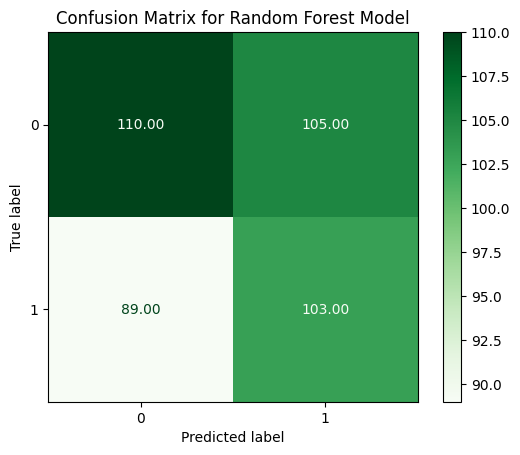

In [ ]:
cm_rf = confusion_matrix(y_test.values.ravel(), predict_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Greens', values_format='.2f')  # Green color for Random Forest 🌲

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

**Save the Model**

In [ ]:
pickle.dump(lr, open('Duration_Days.pkl' , 'wb'))

NameError: name 'lr' is not defined